In [1]:
import pandas as pd
import numpy as np
import itertools
import xarray as xr

In [2]:
f = lambda year: year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)
cnt = 0
yr_lst = []
for i in range(1948,2005+1):
    if f(i):
        cnt+= 1
        yr_lst.append(i)
print(f"Years having leap days: {yr_lst}")
print(f"#Leap Days = {cnt}")

del f, cnt, yr_lst, i

Years having leap days: [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004]
#Leap Days = 15


In [3]:
dr = pd.date_range(start = '1948-01-01', end = '2005-12-31' ) # 21185
print(f"Number of days in the date range: {len(dr)}")
dr = dr[(dr.day != 29) | (dr.month != 2)] # 21170
print(f"Number of days excluding leap days: {len(dr)}")
# Difference between the two is 15 leap days

del dr

Number of days in the date range: 21185
Number of days excluding leap days: 21170


In [4]:
Num_of_years = len(np.arange(1948,2005+1))
print(f"Number of years: {Num_of_years}")

print(f"360_day datetime format: {Num_of_years*360} Days (GCMs: HadGEM2-ES)") # 1 Month is missing
print(f"NoLeap or 365_day datetime format: {Num_of_years*365} Days (GCMs: MIROC-ESM, CanESM2, GFDL-CM3)")
print()
print("HadGEM2-ES daily data is till Novmber-2005 (2005-11-30) and not December-2005 (2005-12-30)")
print(f"HadGEM2-ES #Days = {Num_of_years*360 - 30} days")
print("Additionally, Feb-30 is an incompatiple date that doesn't exist within the reanalysis data, so we remove them along with the leap days (Feb-29)")
print("*********************************************************")
print("Finally,")
print(f"HadGEM2-ES #Days = {Num_of_years*360 - 30 - Num_of_years*2} days")
print(f"MIROC-ESM, CanESM2, GFDL-CM3 #Days = {Num_of_years*365} days")
print("*********************************************************")

del Num_of_years

Number of years: 58
360_day datetime format: 20880 Days (GCMs: HadGEM2-ES)
NoLeap or 365_day datetime format: 21170 Days (GCMs: MIROC-ESM, CanESM2, GFDL-CM3)

HadGEM2-ES daily data is till Novmber-2005 (2005-11-30) and not December-2005 (2005-12-30)
HadGEM2-ES #Days = 20850 days
Additionally, Feb-30 is an incompatiple date that doesn't exist within the reanalysis data, so we remove them along with the leap days (Feb-29)
*********************************************************
Finally,
HadGEM2-ES #Days = 20734 days
MIROC-ESM, CanESM2, GFDL-CM3 #Days = 21170 days
*********************************************************


In [4]:
'''
CanESM2: (7, 21170, 129, 135)
GFDL-CM3: (7, 21170, 129, 135)
HadGEM2-ES: (7, 20734, 129, 135)
MIROC-ESM: (7, 21170, 129, 135)
'''
CanESM2 = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/CanESM2.npy")
GFDL_CM3 = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/GFDL-CM3.npy")
HadGEM2_ES = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/HadGEM2-ES.npy")
MIROC_ESM = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/MIROC-ESM.npy")
print(f"CanESM2: {CanESM2.shape}")
print(f"GFDL-CM3: {GFDL_CM3.shape}")
print(f"HadGEM2-ES: {HadGEM2_ES.shape}")
print(f"MIROC-ESM: {MIROC_ESM.shape}")

CanESM2: (7, 21170, 129, 135)
GFDL-CM3: (7, 21170, 129, 135)
HadGEM2-ES: (7, 20734, 129, 135)
MIROC-ESM: (7, 21170, 129, 135)


In [5]:
'''
Y: (1, 21170, 129, 135)
Y_360: (1, 20734, 129, 135)
'''
Y = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y.npy")
Y_360 = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y_360.npy")
print(f"Y: {Y.shape}")
print(f"Y_360: {Y_360.shape}")

Y: (1, 21170, 129, 135)
Y_360: (1, 20734, 129, 135)


In [2]:
import tensorflow.keras.preprocessing as prep
def data_generator(X,Y):
    time_steps = 4
    batch_size1 = 1
    generator = prep.sequence.TimeseriesGenerator(
        X, 
        Y.reshape(-1, 129, 135, 1),
        length=time_steps, 
        batch_size=batch_size1
        )
    return generator

In [7]:
for xx, yy, name in zip([CanESM2, GFDL_CM3, HadGEM2_ES, MIROC_ESM], [Y, Y, Y_360, Y], ['CanESM2', 'GFDL-CM3', 'HadGEM2-ES', 'MIROC-ESM']):
    X = xx.transpose(1,2,3,0)
    YY = yy.reshape(-1,129, 135, 1)
    generator = data_generator(X,YY) # (1, 4, 129, 135, 7) (1, 129, 135, 1)
    cnt = 0
    for x, y in itertools.islice(generator, 0, None, 1):
        cnt += 1
    print(f"{name}: {cnt}")
del X, YY, generator, cnt, x, y, xx, yy

CanESM2: 21166
GFDL-CM3: 21166
HadGEM2-ES: 20730
MIROC-ESM: 21166


In [8]:
del CanESM2, GFDL_CM3, HadGEM2_ES, MIROC_ESM, Y, Y_360

In [9]:
X = np.arange(1,100+1)
Y = np.arange(1,100+1)
def data_generator(X,Y):
    time_steps = 4
    batch_size1 = 1
    generator = prep.sequence.TimeseriesGenerator(
        X, 
        Y,
        length=time_steps, 
        batch_size=batch_size1
        )
    return generator

generator = data_generator(X,Y)
for x, y in itertools.islice(generator, 0, 2, 1):
    print(x.shape, y.shape)
    print(x)
    print(y)

del X, Y, generator, x, y

(1, 4) (1,)
[[1 2 3 4]]
[5]
(1, 4) (1,)
[[2 3 4 5]]
[6]


In [36]:
Y_hat = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/04_Testing_Stacks/npy_Files/yy_hat_MIROC-ESM.npy").reshape(-1,129,135)
Y = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/Stacked/Y.npy").reshape(-1,129,135)[4:]
print(f"Y: {Y.shape}; Y_hat: {Y_hat.shape}")

Y: (21166, 129, 135); Y_hat: (21166, 129, 135)


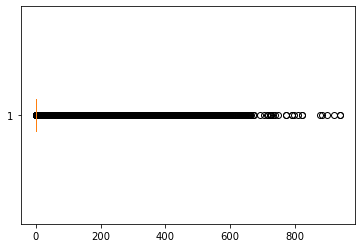

In [37]:
plt.boxplot(Y.flatten(), vert = False)
plt.show()

In [38]:
Y = Y - Y.mean()
Y = Y / Y.std()

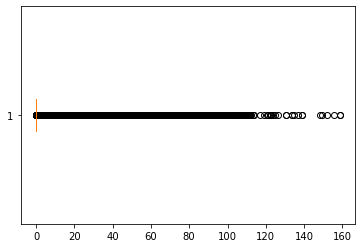

In [39]:
plt.boxplot(Y.flatten(), vert = False)
plt.show()

In [40]:
from tqdm import tqdm
rmse = np.zeros((129,135))
rmse_hist = np.zeros((21166,129,135))
for ind in tqdm(range(21166)):
    yy_pred = Y_hat[ind].reshape(129,135)
    yy = Y[ind].reshape(129,135)
    rmse += np.square(yy - yy_pred)
    rmse_hist[ind] = np.sqrt(rmse/(ind+1))
rmse = np.sqrt(rmse/ind+1)
print(ind+1)

100%|██████████| 21166/21166 [00:09<00:00, 2154.46it/s]

21166


In [42]:
Y_diff = np.sqrt(np.sum(np.square(Y - Y_hat), axis = 0)/21166)
Y_diff.shape

(129, 135)

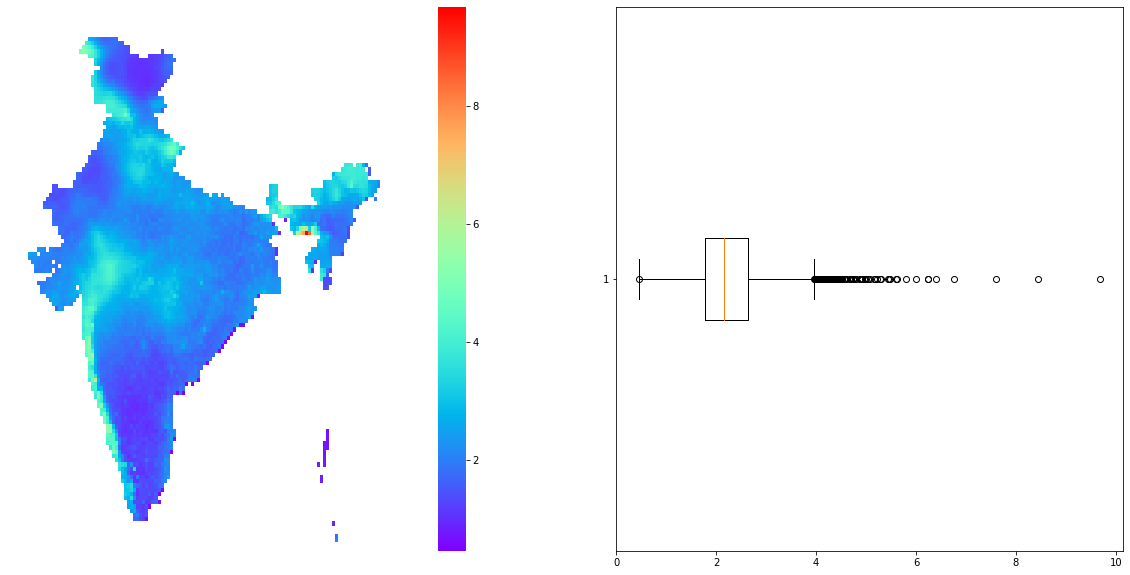

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# rrmse = rmse_hist[-1]
rrmse = np.array(Y_diff)
FileName = r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/SRTM.npy"
mask = np.load(FileName)
indices = np.where(mask == 0)
rrmse[indices] = np.nan
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(np.flip(rrmse, axis = 0), cmap = 'rainbow', ax =ax[0])
ax[0].axis('off')
ax[1].boxplot(rrmse[~np.isnan(rrmse)], vert = False)
plt.show()

In [21]:
ds = xr.open_dataset(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/NC_Files/IMD.nc")
print(ds.rain.units)
del ds

mm/day


In [16]:
X = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/03_Preprocess_Data/npy_Files/MIROC-ESM.npy")
print(X.mean(), X.std())

4.2406795e-05 7.3909694e-05


In [22]:
Y = np.load(r"/home/uditbhatia/Documents/Sarth/Downscaling_AugmentedConvLSTM/04_Testing_Stacks/npy_Files/yy_hat_MIROC-ESM.npy").reshape(-1,129,135)
print(Y.mean(), Y.std())

0.3701965 1.3832935


In [23]:
Z = np.array(Y)*X.std()
print(Z.mean(), Z.std())

2.736114e-05 0.00010223901
